<div>
<img src="https://www.saveur.com/resizer/sq-17z6mrjFQ0T0mDm-_OBNaEWU=/760x950/arc-anglerfish-arc2-prod-bonnier.s3.amazonaws.com/public/6U5RCBTPHKMZNVG5L3FKKSCIOU.jpg" width="150" align="left"/>
</div>



## Homework 2

A child has available a certain number of ice cream scoops every day, 's'. The child can store a number of scoops for the next day 'a' and eat the remainder scoops c = s − a. The number of scoops available the next day, s′, is equal to the number of scoops stored over night, a, plus an additional scoops provided by the parents, e. The number of scoops available the next day is given by:

s' = a + e'

s' = (s-c) + e'

e' must be known after the decision "a" is made. 

The child can store up to 2 scoops in the fridge every day which implies that a ∈ {0, 1, 2}, s ∈ {0, 1, 2, 3, 4} & e
∈ {0,1,2}.



#### Necessary imports

In [1]:
import sys
import pandas as pd
import numpy as np
import os
from os.path import basename
import platform

import datetime
from datetime import date

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import quantecon as qe

import warnings
warnings.filterwarnings("ignore") # supress warnings

pd.set_option('display.float_format', lambda x: '%.5f' % x)

np.set_printoptions(threshold=sys.maxsize)

# enable ability to see the value of multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/Users/colella2/opt/anaconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10005. The TBB threading layer is disabled.
  warnings.warn(problem)


#### Check versions

In [2]:
# Darwin is an open-source Unix-like operating system by Apple
# Darwin forms the core set of components for macOS
platform.system()
platform.release()
platform.version()

# check python version
from platform import python_version
print(python_version())

'Darwin'

'19.6.0'

'Darwin Kernel Version 19.6.0: Sun Jul  5 00:43:10 PDT 2020; root:xnu-6153.141.1~9/RELEASE_X86_64'

3.7.7


In [3]:
print('numpy: %s' % np.__version__)
print('pandas: %s' % pd.__version__)

numpy: 1.19.1
pandas: 1.0.5


In [4]:
print("Your working directory is:") 
%pwd

Your working directory is:


'/Users/colella2/Google Drive/Graduate School/MScA/Courses/Reinforcement Learning/assignments/assignment2'

In [5]:
now = datetime.datetime.now()

print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2020-08-06 15:10:17


#### The transition probability matrix from e to e′ is given by:

In [6]:
prob_matrix = np.array(
    
            [[0.8, 0.1, 0.1],
            [0.01, 0.98, 0.01],
            [0.1, 0.1, 0.8]]
    
)

prob_matrix

array([[0.8 , 0.1 , 0.1 ],
       [0.01, 0.98, 0.01],
       [0.1 , 0.1 , 0.8 ]])

#### 1) Construct the transition probability from (s, e) to (s′, e′) for each action a ∈ {0, 1, 2}.

In [7]:
# probability matrix for (s,e) will be 15 x 15 to start
cols = []

for s in range(5):
    for e in range(3):
        cols.append((s,e))

# prepare (s, e) column headers/names
cols

[(0, 0),
 (0, 1),
 (0, 2),
 (1, 0),
 (1, 1),
 (1, 2),
 (2, 0),
 (2, 1),
 (2, 2),
 (3, 0),
 (3, 1),
 (3, 2),
 (4, 0),
 (4, 1),
 (4, 2)]

In [8]:
# return 15 x 15 array without initializing entries
prob_matrix_se = np.empty((15,15))

# fill with NaNs
prob_matrix_se[:] = np.nan

# overlay column names
prob_matrix_se_df = pd.DataFrame(prob_matrix_se, columns = cols, index = cols)

# preview result
prob_matrix_se_df

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(0, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(0, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [9]:
# since e cannot be > s, probability of transitioning from (s,e) 
# where s < e is 0


# can reduce state space by looping through (s, e) and (s', e') to eliminate rows with 0 probability

# start with (s,e)
for (s,e) in cols:
    if s < e:
        prob_matrix_se_df.drop([(s,e)], inplace = True)
        
prob_matrix_se_df

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [10]:
# move on to (s',e')

for(s_prime,e_prime) in cols: 
    if s_prime < e_prime:
        prob_matrix_se_df.drop(columns=[(s_prime,e_prime)], inplace = True)  
        
prob_matrix_se_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [11]:
# view revised list of states after elimination of rows & cols w/ 0 probability
cols = list(prob_matrix_se_df)
cols

# review corresponding revised matrix, which is now a 12 x 12
# so, state space was reduced by 1/5th
prob_matrix_se_df

[(0, 0),
 (1, 0),
 (1, 1),
 (2, 0),
 (2, 1),
 (2, 2),
 (3, 0),
 (3, 1),
 (3, 2),
 (4, 0),
 (4, 1),
 (4, 2)]

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [12]:
# create copies of transition prob. matrix for analysis of each action a ∈ {0, 1, 2}

prob_matrix_se_df_0 = prob_matrix_se_df.copy()
prob_matrix_se_df_0

prob_matrix_se_df_1 = prob_matrix_se_df.copy()
prob_matrix_se_df_1

prob_matrix_se_df_2 = prob_matrix_se_df.copy()
prob_matrix_se_df_2

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


For a = 0, s' must be equal to e', so probability of transitioning to (s',e') where s' != e' should be 0

In [13]:
# looping through (s', e') columns
for (s_prime,e_prime) in cols: # s_prime and e_prime correspond to columns
    if s_prime != e_prime:
        prob_matrix_se_df_0.loc[:, (s_prime,e_prime)] = 0

    
# transition from (s,e) to (s',e') should now only depend on trans. prob. mat. e
for (s,e) in cols:
    for(s_prime,e_prime) in cols:
        if prob_matrix_se_df_0.at[(s,e), (s_prime,e_prime)] != 0:
            prob_matrix_se_df_0.at[(s,e), (s_prime,e_prime)] = prob_matrix[e,e_prime]
            

# view result
prob_matrix_se_df_0

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.80000,0,0.10000,0,0,0.10000,0,0,0,0,0,0
"(1, 0)",0.80000,0,0.10000,0,0,0.10000,0,0,0,0,0,0
"(1, 1)",0.01000,0,0.98000,0,0,0.01000,0,0,0,0,0,0
"(2, 0)",0.80000,0,0.10000,0,0,0.10000,0,0,0,0,0,0
"(2, 1)",0.01000,0,0.98000,0,0,0.01000,0,0,0,0,0,0
"(2, 2)",0.10000,0,0.10000,0,0,0.80000,0,0,0,0,0,0
"(3, 0)",0.80000,0,0.10000,0,0,0.10000,0,0,0,0,0,0
"(3, 1)",0.01000,0,0.98000,0,0,0.01000,0,0,0,0,0,0
"(3, 2)",0.10000,0,0.10000,0,0,0.80000,0,0,0,0,0,0
"(4, 0)",0.80000,0,0.10000,0,0,0.10000,0,0,0,0,0,0


For a = 1, s' must be equal to e', therefore, probability on transitioning to (s',e') where s' != e' + 1 should be 0.

In [14]:
# looping through (s', e')
for (s_prime,e_prime) in cols: # s_prime and e_prime corresponds to columns
    if s_prime != e_prime + 1:
        prob_matrix_se_df_1.loc[:, (s_prime,e_prime)] = 0
        
# transitioning from (s,e) to (s',e') should now only be dependent on transition probability matrix (e,e')
for (s,e) in cols:
    for(s_prime,e_prime) in cols:
        if prob_matrix_se_df_1.at[(s,e), (s_prime,e_prime)] != 0:
            prob_matrix_se_df_1.at[(s,e), (s_prime,e_prime)] = prob_matrix[e,e_prime]
            
# view result        
prob_matrix_se_df_1

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0,0.80000,0,0,0.10000,0,0,0,0.10000,0,0,0
"(1, 0)",0,0.80000,0,0,0.10000,0,0,0,0.10000,0,0,0
"(1, 1)",0,0.01000,0,0,0.98000,0,0,0,0.01000,0,0,0
"(2, 0)",0,0.80000,0,0,0.10000,0,0,0,0.10000,0,0,0
"(2, 1)",0,0.01000,0,0,0.98000,0,0,0,0.01000,0,0,0
"(2, 2)",0,0.10000,0,0,0.10000,0,0,0,0.80000,0,0,0
"(3, 0)",0,0.80000,0,0,0.10000,0,0,0,0.10000,0,0,0
"(3, 1)",0,0.01000,0,0,0.98000,0,0,0,0.01000,0,0,0
"(3, 2)",0,0.10000,0,0,0.10000,0,0,0,0.80000,0,0,0
"(4, 0)",0,0.80000,0,0,0.10000,0,0,0,0.10000,0,0,0


For a = 2, s' must be equal to e', therefore, probability on transitioning to (s',e') where s' != e' + 2 should be 0.

In [15]:
#looping through (s', e')
for (s_prime,e_prime) in cols: # s_ and e_ corresponds to columns
    if s_prime != e_prime + 2:
        prob_matrix_se_df_2.loc[:, (s_prime, e_prime)] = 0
        
# transitioning from (s,e) to (s',e') should now only be dependent on transition probability matrix (e,e')
for (s,e) in cols:
    for(s_prime,e_prime) in cols:
        if prob_matrix_se_df_2.at[(s,e), (s_prime,e_prime)] != 0:
            prob_matrix_se_df_2.at[(s,e), (s_prime,e_prime)] = prob_matrix[e,e_prime]
            
            
# view result
prob_matrix_se_df_2

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0,0,0,0.80000,0,0,0,0.10000,0,0,0,0.10000
"(1, 0)",0,0,0,0.80000,0,0,0,0.10000,0,0,0,0.10000
"(1, 1)",0,0,0,0.01000,0,0,0,0.98000,0,0,0,0.01000
"(2, 0)",0,0,0,0.80000,0,0,0,0.10000,0,0,0,0.10000
"(2, 1)",0,0,0,0.01000,0,0,0,0.98000,0,0,0,0.01000
"(2, 2)",0,0,0,0.10000,0,0,0,0.10000,0,0,0,0.80000
"(3, 0)",0,0,0,0.80000,0,0,0,0.10000,0,0,0,0.10000
"(3, 1)",0,0,0,0.01000,0,0,0,0.98000,0,0,0,0.01000
"(3, 2)",0,0,0,0.10000,0,0,0,0.10000,0,0,0,0.80000
"(4, 0)",0,0,0,0.80000,0,0,0,0.10000,0,0,0,0.10000


#### 2) The child subjected utility from eating ice cream is log( c + 1) if c ≥ 0 and −∞ otherwise.  Construct the reward matrix for each transition (s, e, a) and (s′, e′).

In [16]:
# construct reward function
def reward(c):
    if c >= 0:
        return np.log(c + 1) # given
    else:
        return -8000000000.0 # placeholder for negative infinity
    

# apply function to get (s, e, a) combos
rew_row = []

for a in range(3):
    for (s,e) in cols:
        rew_row.append((s,e,a))

# view result
rew_row

[(0, 0, 0),
 (1, 0, 0),
 (1, 1, 0),
 (2, 0, 0),
 (2, 1, 0),
 (2, 2, 0),
 (3, 0, 0),
 (3, 1, 0),
 (3, 2, 0),
 (4, 0, 0),
 (4, 1, 0),
 (4, 2, 0),
 (0, 0, 1),
 (1, 0, 1),
 (1, 1, 1),
 (2, 0, 1),
 (2, 1, 1),
 (2, 2, 1),
 (3, 0, 1),
 (3, 1, 1),
 (3, 2, 1),
 (4, 0, 1),
 (4, 1, 1),
 (4, 2, 1),
 (0, 0, 2),
 (1, 0, 2),
 (1, 1, 2),
 (2, 0, 2),
 (2, 1, 2),
 (2, 2, 2),
 (3, 0, 2),
 (3, 1, 2),
 (3, 2, 2),
 (4, 0, 2),
 (4, 1, 2),
 (4, 2, 2)]

In [17]:
# return 36 X 12 array without initializing entries
# 12 for me b/c of reduced state space
rewards_sea = np.empty((len(rew_row),len(cols)))

# fill with NaNs
rewards_sea[:] = np.nan

# overlay column names
rewards_sea_df = pd.DataFrame(rewards_sea, columns=cols, index=rew_row)

# view result
rewards_sea_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [18]:
# apply reward function 

# reward is dependent on availability of ice cream, s, at the initial state
for (s,e,a) in rew_row:
    c = s - a
    rewards_sea_df.loc[(s,e,a),:] = reward(c)
    
# view result
rewards_sea_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0, 0)",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(1, 0, 0)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(1, 1, 0)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(2, 0, 0)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(2, 1, 0)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(2, 2, 0)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(3, 0, 0)",1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629
"(3, 1, 0)",1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629
"(3, 2, 0)",1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629
"(4, 0, 0)",1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944


In [19]:
# create a copy of transition probability matrix for analysis of rewards for each action a ∈ {0, 1, 2}

rewards_sea_df_0 = prob_matrix_se_df.copy()
rewards_sea_df_0

rewards_sea_df_1 = prob_matrix_se_df.copy()
rewards_sea_df_1

rewards_sea_df_2 = prob_matrix_se_df.copy()
rewards_sea_df_2

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [20]:
# reward matrix for all values for a

a = 0
for (s,e) in cols:
    c = s - a
    rewards_sea_df_0.loc[(s,e),:] = reward(c)
      
a = 1
for (s,e) in cols:
    c = s - a
    rewards_sea_df_1.loc[(s,e),:] = reward(c)

a = 2
for (s,e) in cols:
    c = s - a
    rewards_sea_df_2.loc[(s,e),:] = reward(c)
    
# if s-c = 0, that means all ice cream was consumed


# immediate expected rewards in 0-2 neighborhood
rewards_sea_df_0

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(1, 0)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(1, 1)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(2, 0)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(2, 1)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(2, 2)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(3, 0)",1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629
"(3, 1)",1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629
"(3, 2)",1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629
"(4, 0)",1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944,1.60944


In [21]:
# preview result for 1

rewards_sea_df_1 # can see my placeholder for negative infinity

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000
"(1, 0)",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(1, 1)",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(2, 0)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(2, 1)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(2, 2)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(3, 0)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(3, 1)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(3, 2)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861
"(4, 0)",1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629,1.38629


In [22]:
# preview result for 2

rewards_sea_df_2

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000
"(1, 0)",-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000
"(1, 1)",-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000,-8000000000.00000
"(2, 0)",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(2, 1)",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(2, 2)",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(3, 0)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(3, 1)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(3, 2)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(4, 0)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861


#### 3) Apply the value iteration approach to compute the value function for each state and optimal policy. Iterate 600 times.

In [23]:
# combine all transition probabilities into one array
p_all = np.array([prob_matrix_se_df_0, prob_matrix_se_df_1, prob_matrix_se_df_2],dtype=float)
p_all.shape

p_all

(3, 12, 12)

array([[[0.8 , 0.  , 0.1 , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.8 , 0.  , 0.1 , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.01, 0.  , 0.98, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.8 , 0.  , 0.1 , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.01, 0.  , 0.98, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.1 , 0.  , 0.1 , 0.  , 0.  , 0.8 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.8 , 0.  , 0.1 , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.01, 0.  , 0.98, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.1 , 0.  , 0.1 , 0.  , 0.  , 0.8 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.8 , 0.  , 0.1 , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.01, 0.  , 0.98, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],

In [24]:
# combine all rewards into one array
r_all = np.array([rewards_sea_df_0, rewards_sea_df_1, rewards_sea_df_2],dtype=float)
r_all.shape

r_all

(3, 12, 12)

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
          6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
          6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
          6.93147181e-01,  6.93147181e-01,  6.93147181e-01],
        [ 6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
          6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
          6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
          6.93147181e-01,  6.93147181e-01,  6.93147181e-01],
        [ 1.09861229e+00,  1.09861229e+00,  1.09861229e+00,
          1.09861229e+00,  1.09861229e+00,  1.09861229e+00,
          1.09861229e+00,  1.09861229e+00,  1.09861229e+00,
          1.09861229e+00,  1.09861229e+00,  1.09861229e+00],
        [ 1.09861229e+00,  1.0986122

In [25]:
K,N,M = p_all.shape

In [26]:
# instantiate expected reward matrix
q = np.zeros((K,N,1), dtype = np.float64)# create three 12 x 1 arrays
q.shape


# loop through each (K,N,M) array
for i in range(0,N): # N is 12
    for k in range(0,K): # K is 3
        for j in range(0,M): # M is 2
            q[k,i,0] = q[k,i,0] + r_all[k,i,j]*p_all[k,i,j]

# view result
q

(3, 12, 1)

array([[[ 0.00000000e+00],
        [ 6.93147181e-01],
        [ 6.93147181e-01],
        [ 1.09861229e+00],
        [ 1.09861229e+00],
        [ 1.09861229e+00],
        [ 1.38629436e+00],
        [ 1.38629436e+00],
        [ 1.38629436e+00],
        [ 1.60943791e+00],
        [ 1.60943791e+00],
        [ 1.60943791e+00]],

       [[-8.00000000e+09],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 6.93147181e-01],
        [ 6.93147181e-01],
        [ 6.93147181e-01],
        [ 1.09861229e+00],
        [ 1.09861229e+00],
        [ 1.09861229e+00],
        [ 1.38629436e+00],
        [ 1.38629436e+00],
        [ 1.38629436e+00]],

       [[-8.00000000e+09],
        [-8.00000000e+09],
        [-8.00000000e+09],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 6.93147181e-01],
        [ 6.93147181e-01],
        [ 6.93147181e-01],
        [ 1.09861229e+00],
        [ 1.09861229e+00],
        [ 1.09861229e+00]]])

In [27]:
# number of episodes
T = 600

# value table
v = np.zeros((N,T),dtype=np.float64) # N is 12
v.shape
v

# decisions table
d = np.zeros((N,T),dtype=np.float64)
d.shape
d

(12, 600)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

(12, 600)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [28]:
for n in range(1,T): # T is 600; have to start n at 1 b/c below access n-1 th element
    # y0 = 12 # fails without this line
    for i in range(0,N): # N is 12
            # if i==y0:
                # rhs should be 1 x 3 and will initially be all zeroes
                rhs = np.zeros((1,K),dtype=np.float64) # K is 3
                for k in range(0,K):
                    # access kth element from rhs; rhs[0] is (0,0,0)
                    # q[k][i][0] accesses actual number within 12-item array
                    rhs[0][k] = q[k][i][0] + np.matmul(p_all[k,i,:],v[:,n-1]) # P has 3 arrays that are 12 x 2

                v[i,n] = max(rhs[0])
                d[i,n] = np.argmax(rhs[0])

# value table
v = v.T
v

# decisions table
d = d.T
d

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.93147181e-01, 6.93147181e-01, 1.09861229e+00,
        1.09861229e+00, 1.09861229e+00, 1.38629436e+00, 1.38629436e+00,
        1.38629436e+00, 1.60943791e+00, 1.60943791e+00, 1.60943791e+00],
       [1.79175947e-01, 8.72323127e-01, 1.38341754e+00, 1.49615559e+00,
        1.79058164e+00, 2.04681684e+00, 1.90162070e+00, 2.19604675e+00,
        2.38682372e+00, 2.27707535e+00, 2.48426126e+00, 2.67450580e+00],
       [4.86364195e-01, 1.17951138e+00, 2.07115630e+00, 1.80874622e+00,
        2.48050866e+00, 2.89232511e+00, 2.37712691e+00, 2.88697961e+00,
        3.27436174e+00, 2.78259202e+00, 3.29244471e+00, 3.60743716e+00],
       [8.85439497e-01, 1.57858668e+00, 2.75666725e+00, 2.21224332e+00,
        3.16858439e+00, 3.67863858e+00, 2.78958583e+00, 3.57

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 1., 1., 1., 2., 2., 1.],
       [0., 0., 0., 1., 1., 0., 2., 2., 1., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 1., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 1., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1.,

In [29]:
# policy dataframe
pol_df = pd.DataFrame(d, columns=cols)
pol_df

# value dataframe
val_df = pd.DataFrame(v, columns=cols)
val_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,1.00000
3,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000
4,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
596,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
597,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
598,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000


,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.69315,0.69315,1.09861,1.09861,1.09861,1.38629,1.38629,1.38629,1.60944,1.60944,1.60944
2,0.17918,0.87232,1.38342,1.49616,1.79058,2.04682,1.90162,2.19605,2.38682,2.27708,2.48426,2.67451
3,0.48636,1.17951,2.07116,1.80875,2.48051,2.89233,2.37713,2.88698,3.27436,2.78259,3.29244,3.60744
4,0.88544,1.57859,2.75667,2.21224,3.16858,3.67864,2.78959,3.57655,4.08410,3.19505,3.98201,4.45413
...,...,...,...,...,...,...,...,...,...,...,...,...
595,399.03783,399.73098,401.87991,400.38661,402.44798,402.95003,401.00470,402.97852,403.39302,401.41017,403.38399,403.79849
596,399.71326,400.40641,402.55534,401.06203,403.12341,403.62546,401.68013,403.65395,404.06845,402.08560,404.05941,404.47391
597,400.38869,401.08184,403.23077,401.73746,403.79883,404.30089,402.35556,404.32938,404.74388,402.76102,404.73484,405.14934
598,401.06412,401.75726,403.90620,402.41289,404.47426,404.97632,403.03099,405.00480,405.41930,403.43645,405.41027,405.82477


#### 4) For each e, plot the value function v(s, e) with s on the x-axis. (hint: there should be 3 lines plots, one for each e ∈ {0, 1, 2}.)

In [30]:
# take values at bottom of value table calculated in Question 3 for the (s, e) pairs
# look up value for different states & scoops given combinations
# put none for infeasible states like (0, 1) since can't have 0 if just given a scoop


# build logic for when e = 0

e0 = []

for (s,e) in cols:
    if e == 0:
        e0.append((s, val_df.at[599,(s,e)]))

# examine values and verify against table above
e0

[(0, 401.7395451936743),
 (1, 402.43269237423425),
 (2, 403.08831561062544),
 (3, 403.70641496955346),
 (4, 404.1118800776616)]

In [31]:
# build logic for when e = 1

e1 = []

for (s,e) in cols:
    if e == 1:
        e1.append((s, val_df.at[599,(s,e)]))

# examine values and verify against table above
e1

[(1, 404.5816232510341),
 (2, 405.1496895357041),
 (3, 405.68023218692736),
 (4, 406.0856972950355)]

In [32]:
# build logic for when e = 2

e2 = []

for (s,e) in cols:
    if e == 2:
        e2.append((s, val_df.at[599,(s,e)]))

# examine values and verify against table above
e2

[(2, 405.6517433367584), (3, 406.0947320085288), (4, 406.50019711663697)]

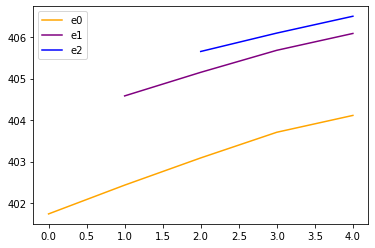

In [33]:
# plot

# prepare e = 0 values
x_list = [z[0] for z in e0]
y_list = [z[1] for z in e0]
f = plt.plot(x_list, y_list, label='e0', color = 'orange')

# prepare e = 1 values
x_list_2 = [z[0] for z in e1]
y_list_2 = [z[1] for z in e1]
g = plt.plot(x_list_2, y_list_2, label='e1', color = 'purple')

# prepare e = 2 values
x_list_3 = [z[0] for z in e2]
y_list_3 = [z[1] for z in e2]
x = plt.plot(x_list_3, y_list_3, label='e2', color = 'blue')

# add legend to identify e values
n = plt.legend()

#### 5) For each e, plot the optimal policy for storing ice cream scoops a(s, e) with s on the x- axis. (hint: there should be 3 lines plots, one for each e ∈ {0, 1, 2}.)

In [34]:
# same as above but for decision data

# build logic for when e = 0

e0_ = []

for (s,e) in cols:
    if e == 0:
        e0_.append((s, pol_df.at[599,(s,e)]))

# examine values and verify against table above
e0_

[(0, 0.0), (1, 0.0), (2, 1.0), (3, 2.0), (4, 2.0)]

In [35]:
# build logic for when e = 1

e1_ = []

for (s,e) in cols:
    if e == 1:
        e1_.append((s, pol_df.at[599,(s,e)]))

# examine values and verify against table above
e1_

[(1, 0.0), (2, 1.0), (3, 2.0), (4, 2.0)]

In [36]:
# build logic for when e = 2

e2_ = []

for (s,e) in cols:
    if e == 2:
        e2_.append((s, pol_df.at[599,(s,e)]))

# examine values and verify against table above      
e2_

[(2, 1.0), (3, 2.0), (4, 2.0)]

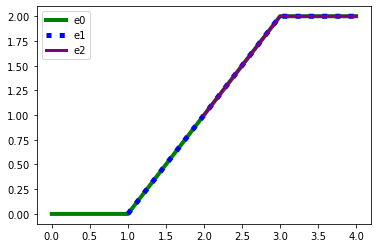

In [37]:
# plot

# prepare e = 0 values
x_list_4 = [z[0] for z in e0_]
y_list_4 = [z[1] for z in e0_]
ff = plt.plot(x_list_4, y_list_4, label='e0', color = 'green', lw = 4)

# prepare e = 1 values
x_list_5 = [z[0] for z in e1_]
y_list_5 = [z[1] for z in e1_]
gg = plt.plot(x_list_5, y_list_5, label='e1', color = 'blue', linestyle='dotted', lw = 5)

# prepare e = 2 values
x_list_6 = [z[0] for z in e2_]
y_list_6 = [z[1] for z in e2_]
uu = plt.plot(x_list_6, y_list_6, label='e2', color = 'purple', lw = 3)

# add legend to identify e values
l = plt.legend()

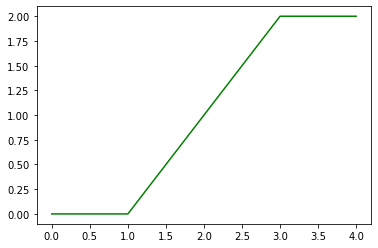

In [38]:
# show e = 0 individually

# prepare e = 0 values
x_list_4 = [z[0] for z in e0_]
y_list_4 = [z[1] for z in e0_]
ff = plt.plot(x_list_4, y_list_4, label='e0', color = 'green')

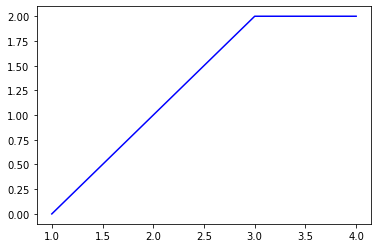

In [39]:
# show e = 1 individually

# prepare e = 1 values
x_list_5 = [z[0] for z in e1_]
y_list_5 = [z[1] for z in e1_]
gg = plt.plot(x_list_5, y_list_5, label='e1', color = 'blue')

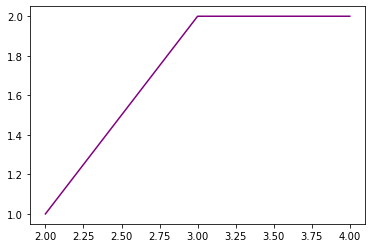

In [40]:
# show e = 2 individually

# prepare e = 2 values
x_list_6 = [z[0] for z in e2_]
y_list_6 = [z[1] for z in e2_]
uu = plt.plot(x_list_6, y_list_6, label='e2', color = 'purple')

#### 6) For each e, plot the optimal policy for consuming ice cream scoops c(s, e) with s on the x-axis. (hint: there should be 3 lines plots, one for each e ∈ {0, 1, 2}.)

In [41]:
# build logic for when e = 0

_e0 = []

for (s,e) in cols:
    if e == 0:
        _e0.append((s, s - pol_df.at[599,(s,e)]))

# examine values and verify against table above 
_e0

[(0, 0.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 2.0)]

In [42]:
# build logic for when e = 1

_e1 = []

for (s,e) in cols:
    if e == 1:
        _e1.append((s, s - pol_df.at[599,(s,e)]))
        
# examine values and verify against table above 
_e1

[(1, 1.0), (2, 1.0), (3, 1.0), (4, 2.0)]

In [43]:
# build logic for when e = 2

_e2 = []

for (s,e) in cols:
    if e == 2:
        _e2.append((s, s - pol_df.at[599,(s,e)]))
        
# examine values and verify against table above 
_e2

[(2, 1.0), (3, 1.0), (4, 2.0)]

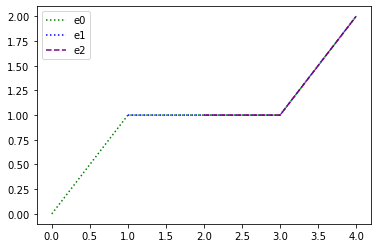

In [44]:
# plot

# prepare e = 0 values; they extend the whole graph
x_list_7 = [z[0] for z in _e0]
y_list_7 = [z[1] for z in _e0]
ff = plt.plot(x_list_7, y_list_7, label='e0', color = 'green', linestyle='dotted')

# prepare e = 1 values; they extend from the middle on
x_list_8 = [z[0] for z in _e1]
y_list_8 = [z[1] for z in _e1]
gg = plt.plot(x_list_8, y_list_8, label='e1', color = 'blue', linestyle='dotted')

# prepare e = 2 values; they extend the end of the graph as shown in purple
x_list_9 = [z[0] for z in _e2]
y_list_9 = [z[1] for z in _e2]
uu = plt.plot(x_list_9, y_list_9, label='e2', color = 'purple', linestyle='dashed')

# add legend to identify e values
l = plt.legend()

#### 7) Simulate a sequence of e and set an initial value for s. Given the optimal policy, calculate and plot the evolution of a, c, and s over time.

In [45]:
# set seed to get repeatable results
np.random.seed(33)

# initialize s
s0 = np.random.randint(5, size = 1)[0]
s0

# initialize e
e0 = np.random.randint(3, size = 1)[0]
e0

# initiailize Markov Chain for possible values of e
mc = qe.MarkovChain(prob_matrix, (0,1,2))
mc

# run simulation
# set random state for repeatable results
simulation = mc.simulate(T, init = e0, random_state = 33)
simulation

4

0

Markov chain with transition matrix 
P = 
[[0.8  0.1  0.1 ]
 [0.01 0.98 0.01]
 [0.1  0.1  0.8 ]]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [46]:
# arrays for storing the s, e, a & c values
evo = np.empty((T, 4))

# preview result
evo

array([[ 0.00000000e+000,  7.31217156e-322,  6.94262254e-310,
         6.94262216e-310],
       [ 1.69759663e-313,  2.36936173e-314,  2.17235717e-153,
         1.69375610e+190],
       [ 3.04040186e+180,  1.99503503e+161,  2.60091039e-144,
         1.37817039e-046],
       [ 2.10714976e-076,  6.94262253e-310,  4.24399158e-314,
         9.35549580e+250],
       [ 2.14729013e+243,  6.94263078e-310,  5.51718906e-313,
         9.27724459e+242],
       [ 4.45998871e-086,  6.94262253e-310,  0.00000000e+000,
         5.04870696e+223],
       [ 6.94262253e-310,  6.94262253e-310,  1.69759663e-313,
         2.36936173e-314],
       [ 1.48776596e+195,  1.39396920e+006,  1.69784975e+199,
         9.81816064e+252],
       [ 6.78852984e+199,  2.29487586e+242,  1.14548501e-070,
         6.94262253e-310],
       [ 4.24399158e-314,  1.94756369e+243,  2.22579224e+025,
         6.94263080e-310],
       [ 2.33419537e-313,  2.59338585e+161,  2.39940623e-071,
         6.94262253e-310],
       [ 0.00000000e+

In [47]:
for i in range(T):
    e = simulation[i] # received
    a = int(pol_df.at[T - 1 - i, (s, e)]) # saved
    c = s - a # consumed
    evo[i, :] = [s, e, a, c]
    if i != T - 1:
        s = int(a + simulation[i+1]) # define s'
        
evo

array([[4., 0., 2., 2.],
       [2., 0., 1., 1.],
       [1., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],


s comes first then a then c


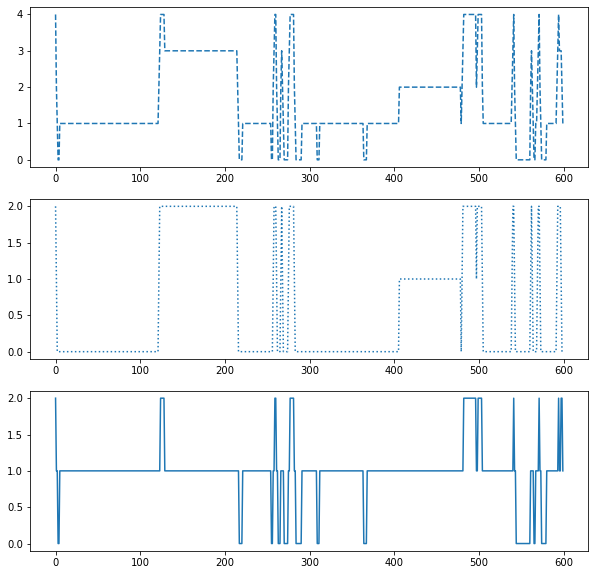

In [48]:
# plot
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

print('s comes first then a then c')

tt = ax[0].plot(evo[:,0], label="s", linestyle = 'dashed')
ty = ax[1].plot(evo[:,2], label="a", linestyle = 'dotted')
tz = ax[2].plot(evo[:,3], label="c")

#### 8) Construct the transition probability and reward matrices between (s, e) and (s′, e′) that produces the highest expected discount rewards. (hint: you need to use the optimal policy)

In [49]:
# instantiate matrix full of NaNs
p_mat_se_df_8 = prob_matrix_se_df.copy()

In [50]:
# for 0 and preview result

for (s,e) in cols:
    for(s_prime,e_prime) in cols:
        if pol_df.at[599,(s,e)] == 0:
            p_mat_se_df_8.at[(s,e),(s_prime,e_prime)] = prob_matrix_se_df_0.at[(s,e),(s_prime,e_prime)]

p_mat_se_df_8

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.80000,0.00000,0.10000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(1, 0)",0.80000,0.00000,0.10000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(1, 1)",0.01000,0.00000,0.98000,0.00000,0.00000,0.01000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(2, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [51]:
# fill for 1 and preview result

for (s,e) in cols:
    for(s_prime,e_prime) in cols:
        if pol_df.at[599,(s,e)] == 1:
            p_mat_se_df_8.at[(s,e),(s_prime,e_prime)] = prob_matrix_se_df_1.at[(s,e),(s_prime,e_prime)]
            
p_mat_se_df_8

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.80000,0.00000,0.10000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(1, 0)",0.80000,0.00000,0.10000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(1, 1)",0.01000,0.00000,0.98000,0.00000,0.00000,0.01000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(2, 0)",0.00000,0.80000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000
"(2, 1)",0.00000,0.01000,0.00000,0.00000,0.98000,0.00000,0.00000,0.00000,0.01000,0.00000,0.00000,0.00000
"(2, 2)",0.00000,0.10000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.80000,0.00000,0.00000,0.00000
"(3, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 1)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(3, 2)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(4, 0)",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [52]:
# fill for 2 and preview result

for (s,e) in cols:
    for(s_prime,e_prime) in cols:
        if pol_df.at[599,(s,e)] == 2:
            p_mat_se_df_8.at[(s,e),(s_prime,e_prime)] = prob_matrix_se_df_2.at[(s,e),(s_prime,e_prime)]

print('Optimal policy-transition matrix:')
p_mat_se_df_8



# do same for computing optimized rewards

reward_8 = prob_matrix_se_df.copy()

print('Corresponding reward matrix:')


for (s,e) in cols:
    for(s_prime,e_prime) in cols:
        if pol_df.at[599,(s,e)] == 0:
            reward_8.at[(s,e),(s_prime,e_prime)] = rewards_sea_df_0.at[(s,e),(s_prime,e_prime)]
        if pol_df.at[599,(s,e)] == 1:
            reward_8.at[(s,e),(s_prime,e_prime)] = rewards_sea_df_1.at[(s,e),(s_prime,e_prime)]
        if pol_df.at[599,(s,e)] == 2:
            reward_8.at[(s,e),(s_prime,e_prime)] = rewards_sea_df_2.at[(s,e),(s_prime,e_prime)]
            
reward_8 

Optimal policy-transition matrix:


,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.80000,0.00000,0.10000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(1, 0)",0.80000,0.00000,0.10000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(1, 1)",0.01000,0.00000,0.98000,0.00000,0.00000,0.01000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(2, 0)",0.00000,0.80000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000
"(2, 1)",0.00000,0.01000,0.00000,0.00000,0.98000,0.00000,0.00000,0.00000,0.01000,0.00000,0.00000,0.00000
"(2, 2)",0.00000,0.10000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.80000,0.00000,0.00000,0.00000
"(3, 0)",0.00000,0.00000,0.00000,0.80000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.10000
"(3, 1)",0.00000,0.00000,0.00000,0.01000,0.00000,0.00000,0.00000,0.98000,0.00000,0.00000,0.00000,0.01000
"(3, 2)",0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.80000
"(4, 0)",0.00000,0.00000,0.00000,0.80000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.10000


Corresponding reward matrix:


,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"(1, 0)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(1, 1)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(2, 0)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(2, 1)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(2, 2)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(3, 0)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(3, 1)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(3, 2)",0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315
"(4, 0)",1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861,1.09861


#### 9) Calculate the value function for the Markov process with rewards that produces the highest expected discount rewards. (hint: use the transition probability and reward matrices from the previous question). Does the value function matches reasonably the value function from the previous question? (hint: it should)
(answer printed below)

In [53]:
print('Following code from 2.4 - Makov Process w/ Rewards')

transition_ideal = np.array(p_mat_se_df_8)
reward_ideal = np.array(reward_8)

N,M = reward_ideal.shape


q = np.zeros((N,1), dtype = np.float64)

for i in range(0,N):
    for j in range(0,N):
        q[i] += np.multiply(reward_ideal[i,j],transition_ideal[i,j])
        

v = np.zeros((N,T),dtype=np.float64)


for n in range(1,T):
    for i in range(0,N):
        v[i,n] = q[i] + np.matmul(transition_ideal[i,:],v[:,n-1])

v.T


# turn result into dataframe format
v_df_ideal = pd.DataFrame(v.T, columns = cols)
v_df_ideal

print('ANSWER: ')
print('Results for the value functions reasonably match. Generally, these are slightly below but they are ballpark the same.')

Following code from 2.4 - Makov Process w/ Rewards


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.93147181e-01, 6.93147181e-01, 6.93147181e-01,
        6.93147181e-01, 6.93147181e-01, 6.93147181e-01, 6.93147181e-01,
        6.93147181e-01, 1.09861229e+00, 1.09861229e+00, 1.09861229e+00],
       [1.38629436e-01, 8.31776617e-01, 1.37936289e+00, 1.38629436e+00,
        1.38629436e+00, 1.38629436e+00, 1.42684087e+00, 1.39034901e+00,
        1.71066645e+00, 1.83230598e+00, 1.79581412e+00, 2.11613156e+00],
       [3.87469274e-01, 1.08061645e+00, 2.06017205e+00, 1.66826455e+00,
        2.07714009e+00, 2.28348744e+00, 2.15283073e+00, 2.09071347e+00,
        2.66371676e+00, 2.55829583e+00, 2.49617858e+00, 3.06918187e+00],
       [7.44341368e-01, 1.43748855e+00, 2.73882536e+00, 2.03172603e+00,
        2.76618780e+00, 3.13989624e+00, 2.54374836e+00, 2.78

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,0.69315,1.09861,1.09861,1.09861
2,0.13863,0.83178,1.37936,1.38629,1.38629,1.38629,1.42684,1.39035,1.71067,1.83231,1.79581,2.11613
3,0.38747,1.08062,2.06017,1.66826,2.07714,2.28349,2.15283,2.09071,2.66372,2.55830,2.49618,3.06918
4,0.74434,1.43749,2.73883,2.03173,2.76619,3.13990,2.54375,2.78942,3.52439,2.94921,3.19489,3.92986
...,...,...,...,...,...,...,...,...,...,...,...,...
595,398.64597,399.33911,401.48805,399.99474,402.05611,402.55816,400.61283,402.58665,403.00115,401.01830,402.99211,403.40661
596,399.32139,400.01454,402.16347,400.67016,402.73154,403.23359,401.28826,403.26207,403.67658,401.69373,403.66754,404.08204
597,399.99682,400.68997,402.83890,401.34559,403.40696,403.90902,401.96369,403.93750,404.35200,402.36915,404.34297,404.75747
598,400.67225,401.36540,403.51433,402.02102,404.08239,404.58444,402.63912,404.61293,405.02743,403.04458,405.01839,405.43290


ANSWER: 
Results for the value functions reasonably match. Generally, these are slightly below but they are ballpark the same.


#### 10) Simulate the Markov process with rewards from the previous question for starting at each state pair (e, s). Compute the average discounted reward. Does it match reasonabily close to the value function in the previous question? (hint: it should)

Yes; results are close to those from the corresponding previous question, which is the 4th question in the assignment.

In [54]:
%%time 
# get computation time as more simulations will increase processing time

# simulate 1000 times -- states are cols, rows are iterations through simulations
# want enough simulations to get close to theoretical values -- increasing from 1000, can get closer to theoretical
# values

simulations = 1000

rewards_simulated = pd.DataFrame(columns = cols)

for i in range(simulations):
    
    rs_list = []
    
    for (s, e) in cols:
        mc = qe.MarkovChain(transition_ideal, cols)
        simulation = mc.simulate(T, init = (s,e)) # T is 600 from beginning for assignment
        rew = 0 # reward
        
        for i in range(len(simulation) - 1):
            rew += reward_8.at[tuple(simulation[i]), tuple(simulation[i+1])]
        
        rs_list.append(rew)
    
    rewards_simulated.loc[len(rewards_simulated)] = rs_list
    

# compute average discounted reward
rewards_simulated.apply(lambda x: x.mean(), axis = 0) # axis = 0 represents rows

CPU times: user 47.9 s, sys: 106 ms, total: 48 s
Wall time: 48.1 s


(0, 0)   402.04757
(1, 0)   401.64363
(1, 1)   404.05589
(2, 0)   402.09935
(2, 1)   404.82515
(2, 2)   405.54621
(3, 0)   402.86109
(3, 1)   405.02614
(3, 2)   405.71957
(4, 0)   404.35599
(4, 1)   405.66405
(4, 2)   405.79178
dtype: float64

In [55]:
# view aggregate results
rewards_simulated

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,412.05776,409.99187,399.34555,412.12343,389.22456,378.32911,420.27129,412.58101,398.31260,404.38103,398.48250,394.49351
1,378.30201,381.02249,405.29619,395.40868,390.16473,415.62773,407.64976,378.02788,407.44130,392.88521,389.39446,380.12087
2,403.73999,404.89072,419.14558,409.16739,421.64404,418.75575,416.08531,412.44967,410.42235,419.40825,410.68502,425.09831
3,382.77568,388.46365,425.58091,407.65185,408.59202,405.23052,413.66607,391.35403,400.65471,409.21950,378.38123,406.93160
4,395.57858,394.59775,392.41407,413.84952,402.79773,407.66331,403.90989,421.65759,367.17309,409.12882,413.99440,404.51236
...,...,...,...,...,...,...,...,...,...,...,...,...
995,398.21983,419.30402,389.62793,363.15909,421.81394,423.04388,403.13753,363.78657,396.82207,401.81690,418.70364,400.61406
996,410.64436,397.78935,405.98933,408.23868,391.01423,404.69372,412.38401,396.28527,398.28759,403.45231,417.05468,427.33410
997,395.51500,422.29862,387.91539,386.00585,412.95937,399.52900,411.70441,418.19185,403.63576,395.06888,418.44097,387.07736
998,399.83023,398.91507,408.15946,406.15923,406.59180,414.07153,399.13708,420.57253,410.20033,394.32362,412.73736,416.55644


In [56]:
# build logic for when e = 0
e_0 = []

for (s,e) in cols:
    if e == 0:
        e_0.append((s, rewards_simulated.mean(axis=0)[(s,e)]))

In [57]:
# build logic for when e = 1
e_1 = []

for (s,e) in cols:
    if e == 1:
        e_1.append((s, rewards_simulated.mean(axis=0)[(s,e)]))

In [58]:
# build logic for when e = 2
e_2 = []

for (s,e) in cols:
    if e == 2:
        e_2.append((s, rewards_simulated.mean(axis=0)[(s,e)]))

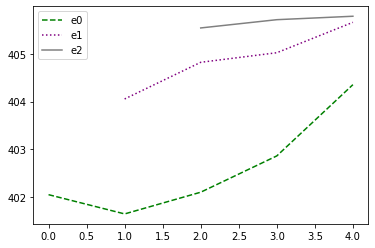

In [59]:
# plot

# prepare e = 0 values
x_list_10 = [z[0] for z in e_0]
y_list_10 = [z[1] for z in e_0]
f = plt.plot(x_list_10, y_list_10, label='e0', color = 'green', linestyle = 'dashed')

# prepare e = 1 values
x_list_11 = [z[0] for z in e_1]
y_list_11 = [z[1] for z in e_1]
g = plt.plot(x_list_11, y_list_11, label='e1', color = 'purple', linestyle = 'dotted')

# prepare e = 2 values
x_list_12 = [z[0] for z in e_2]
y_list_12 = [z[1] for z in e_2]
x = plt.plot(x_list_12, y_list_12, label='e2', color = 'grey')

# add legend to identify e values
nn = plt.legend()

#### 11) Calculate the optimal policy based on the policy iteration approach.
Ultimate results should be (and are) comprable to those presented during value iteration section, which is Question 3.

In [60]:
# instantiate blank storage objects

vs = np.zeros((N,T),dtype=np.float64)

ds = np.zeros((N,T),dtype=np.int)

ws = np.zeros((1,T),dtype=np.float64)

m = np.zeros((N,N),dtype=np.float64)

q_2 = np.zeros((N,1),dtype=np.float64)

q = np.zeros((K,N,1),dtype=np.float64)

In [61]:
# rewards expected
for i in range(0,N):
    for k in range(0,K):
        for j in range(0,M):
            q[k,i,0] = q[k,i,0] + r_all[k,i,j]*p_all[k,i,j]

In [62]:
for n in range(1,T):

    for i in range(0,N):
        rhs = np.zeros((1,K),dtype=np.float64)
        
        for k in range(0,K):
            rhs[0][k] = q[k][i][0] + np.matmul(p_all[k,i,:],vs[:,n-1]) 
            
        vs[i,n] = max(rhs[0])
        ds[i,n] = np.argmax(rhs[0])
        
    for i in range(0,N):
        m[i,:] = p_all[ds[i,n],i,:]
    
    A = np.concatenate((np.identity(N)-m,np.ones((N,1))),axis=1)
    A = np.delete(A,N-1,1)
    
    for i in range(0,N):
        q_2[i,0] = q[ds[i,n],i,0]
        
    temp = np.matmul(np.linalg.inv(A),q_2)
    ws = temp[N-1]
    
    temp[N-1] = 0
    
    vs[:,n] = temp.T # cycles
    
vs = vs.T
ds = ds.T
ws = ws.T

In [63]:
val_df_final = pd.DataFrame(vs, columns = cols)
val_df_final

pol_df_final = pd.DataFrame(ds, columns = cols)
pol_df_final

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,-4.17287,-3.47972,-1.14317,-3.07425,-0.73771,-0.51083,-2.78657,-0.45002,-0.22314,-2.56343,-0.22688,0.00000
2,-4.64287,-3.94972,-1.61317,-3.25658,-0.92003,-0.98083,-2.85111,-0.51456,-0.28768,-2.22728,-0.10740,0.00000
3,-4.92367,-4.23053,-2.06179,-3.56615,-1.36864,-1.06984,-2.90177,-0.70427,-0.66438,-2.49630,-0.29880,0.00000
4,-4.76065,-4.06751,-1.91858,-3.41188,-1.35051,-0.84845,-2.79378,-0.81996,-0.40547,-2.38832,-0.41450,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
595,-4.76065,-4.06751,-1.91858,-3.41188,-1.35051,-0.84845,-2.79378,-0.81996,-0.40547,-2.38832,-0.41450,0.00000
596,-4.76065,-4.06751,-1.91858,-3.41188,-1.35051,-0.84845,-2.79378,-0.81996,-0.40547,-2.38832,-0.41450,0.00000
597,-4.76065,-4.06751,-1.91858,-3.41188,-1.35051,-0.84845,-2.79378,-0.81996,-0.40547,-2.38832,-0.41450,0.00000
598,-4.76065,-4.06751,-1.91858,-3.41188,-1.35051,-0.84845,-2.79378,-0.81996,-0.40547,-2.38832,-0.41450,0.00000


,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,1,1,1,2,2,1
3,0,0,1,1,1,1,2,2,1,2,2,2
4,0,0,0,1,1,1,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,1,1,1,2,2,2,2,2,2
596,0,0,0,1,1,1,2,2,2,2,2,2
597,0,0,0,1,1,1,2,2,2,2,2,2
598,0,0,0,1,1,1,2,2,2,2,2,2
